In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import scipy.stats as sts
import seaborn
import pingouin as pg
from pingouin import pairwise_ttests

In [3]:
file_path = "results.csv"
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8
...,...,...,...,...,...,...,...,...
2389,W,Triple Jump Women,Athens,2004,S,Hrysopiyi DEVETZI,GRE,15.25
2390,W,Triple Jump Women,Athens,2004,B,Tatyana LEBEDEVA,RUS,15.14
2391,W,Triple Jump Women,Atlanta,1996,G,Inessa KRAVETS,UKR,15.33
2392,W,Triple Jump Women,Atlanta,1996,S,Inna LASOVSKAYA,RUS,14.98


In [5]:
df.Event.value_counts()

Marathon Men                84
100M Men                    82
800M Men                    81
1500M Men                   81
110M Hurdles Men            80
400M Men                    80
200M Men                    78
Decathlon Men               76
400M Hurdles Men            75
3000M Steeplechase Men      72
4X400M Relay Men            71
10000M Men                  69
5000M Men                   69
4X100M Relay Men            67
Long Jump Men               63
High Jump Men               62
Shot Put Men                60
Discus Throw Men            60
100M Women                  60
4X100M Relay Women          60
Pole Vault Men              59
50Km Race Walk Men          57
Triple Jump Men             54
Hammer Throw Men            54
Discus Throw Women          53
200M Women                  51
Javelin Throw Men           50
Javelin Throw Women         50
20Km Race Walk Men          48
800M Women                  45
High Jump Women             45
Shot Put Women              41
400M Wom

In [6]:
men_javelin = df[df.Event == 'Javelin Throw Men']
men_javelin

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1262,M,Javelin Throw Men,Rio,2016,G,Thomas ROHLER,GER,None
1263,M,Javelin Throw Men,Rio,2016,S,Julius YEGO,KEN,None
1264,M,Javelin Throw Men,Rio,2016,B,Keshorn WALCOTT,TTO,None
1265,M,Javelin Throw Men,Beijing,2008,G,Andreas THORKILDSEN,NOR,90.57
1266,M,Javelin Throw Men,Beijing,2008,S,Ainars KOVALS,LAT,86.64
1267,M,Javelin Throw Men,Beijing,2008,B,Tero PITKAMAKI,FIN,86.16
1268,M,Javelin Throw Men,Sydney,2000,G,Jan Å½ELEZNÃ,CZE,90.17
1269,M,Javelin Throw Men,Sydney,2000,S,Steve BACKLEY,GBR,89.85
1270,M,Javelin Throw Men,Sydney,2000,B,Sergey MAKAROV,RUS,88.67
1271,M,Javelin Throw Men,Barcelona,1992,G,Jan Å½ELEZNÃ,TCH,89.66


In [8]:
no_result = men_javelin[men_javelin.Result == 'None']
no_result

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1262,M,Javelin Throw Men,Rio,2016,G,Thomas ROHLER,GER,None
1263,M,Javelin Throw Men,Rio,2016,S,Julius YEGO,KEN,None
1264,M,Javelin Throw Men,Rio,2016,B,Keshorn WALCOTT,TTO,None


In [9]:
#Actual results from 2016
rohler = 90.30
yego = 88.24
walcott = 85.38

In [ ]:
men_javelin['Result'][men_javelin.index == 1262] = rohler
men_javelin['Result'][men_javelin.index == 1263] = yego
men_javelin['Result'][men_javelin.index == 1264] = walcott

In [37]:
men_javelin.head(3)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1262,M,Javelin Throw Men,Rio,2016,G,Thomas ROHLER,GER,90.3
1263,M,Javelin Throw Men,Rio,2016,S,Julius YEGO,KEN,88.24
1264,M,Javelin Throw Men,Rio,2016,B,Keshorn WALCOTT,TTO,85.38


In [39]:
men_javelin.dtypes

Gender         object
Event          object
Location       object
Year            int64
Medal          object
Name           object
Nationality    object
Result         object
dtype: object

In [40]:
data_types_dict = {'Gender' : str, 'Event' : str, 'Location' : str, 'Year' : int, 'Medal' : str, 'Name' : str, 'Nationality' : str, 'Result' : float}

In [41]:
men_javelin = men_javelin.astype(data_types_dict)

In [42]:
men_javelin.dtypes

Gender          object
Event           object
Location        object
Year             int32
Medal           object
Name            object
Nationality     object
Result         float64
dtype: object

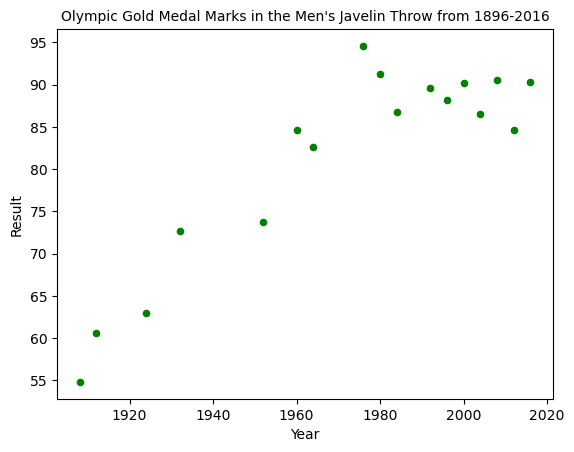

In [57]:
gold = men_javelin[men_javelin.Medal == 'G']
silver = men_javelin[men_javelin.Medal == 'S']
bronze = men_javelin[men_javelin.Medal == 'B']

gold.plot.scatter(x='Year', y='Result', c='green')

plt.title("Olympic Gold Medal Marks in the Men's Javelin Throw from 1896-2016", size=10)
plt.show()

In [67]:
gold = men_javelin[men_javelin.Medal == 'G'][['Year', 'Result']].rename(columns={'Result' : 'Gold'})
silver = men_javelin[men_javelin.Medal == 'S'][['Year', 'Result']].rename(columns={'Result' : 'Silver'})
bronze = men_javelin[men_javelin.Medal == 'B'][['Year', 'Result']].rename(columns={'Result' : 'Bronze'})

### Filter data down to only new rule Javelin 

In [70]:
new_rule = men_javelin[men_javelin.Year >= 1986]
new_rule

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1262,M,Javelin Throw Men,Rio,2016,G,Thomas ROHLER,GER,90.30
1263,M,Javelin Throw Men,Rio,2016,S,Julius YEGO,KEN,88.24
1264,M,Javelin Throw Men,Rio,2016,B,Keshorn WALCOTT,TTO,85.38
1265,M,Javelin Throw Men,Beijing,2008,G,Andreas THORKILDSEN,NOR,90.57
1266,M,Javelin Throw Men,Beijing,2008,S,Ainars KOVALS,LAT,86.64
1267,M,Javelin Throw Men,Beijing,2008,B,Tero PITKAMAKI,FIN,86.16
1268,M,Javelin Throw Men,Sydney,2000,G,Jan Å½ELEZNÃ,CZE,90.17
1269,M,Javelin Throw Men,Sydney,2000,S,Steve BACKLEY,GBR,89.85
1270,M,Javelin Throw Men,Sydney,2000,B,Sergey MAKAROV,RUS,88.67
1271,M,Javelin Throw Men,Barcelona,1992,G,Jan Å½ELEZNÃ,TCH,89.66
